In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
import pandas as pd
disease = {"1037":"hiv","1073":"hiv","1075":"hiv","3009":"unf","3013":"unf","C3":"unf",
           "C4":"unf","hd1":"unf","hd1_unf":"unf","P1":"unf","pid630":"hiv","pid876":"hiv",
           "YW1_suppressed":"hiv","YW8_viremic":"hiv"}
batch = {"1037":"gse202410","1073":"gse202410","1075":"gse202410","3009":"gse202410","3013":"gse202410","C3":"gse243905",
           "C4":"gse243905","hd1":"gse157829","hd1_unf":"gse239916","P1":"gse243905","pid630":"gse157829","pid876":"gse157829",
           "YW1_suppressed":"gse157829","YW8_viremic":"gse157829"}
foldername = "CD4"
dataname = "1037"
df1 = pd.read_csv("data/{foldername}/{dataname}_reactions.tsv".format(foldername=foldername,dataname=dataname), sep="\t", index_col=0)
df1.columns= [dataname+ idx for idx in df1.columns]
#data = [dataname]*len(df1.columns)
data = [disease[dataname]]*len(df1.columns)
#data = [batch[dataname]]*len(df1.columns)
df1_meta = pd.DataFrame(data) 
df1_meta.columns = ["value"]
dataname = "1073"
df2 = pd.read_csv("data/{foldername}/{dataname}_reactions.tsv".format(foldername=foldername,dataname=dataname), sep="\t", index_col=0)
df2.columns= [dataname+ idx for idx in df2.columns]
#data = [dataname]*len(df2.columns) 
data = [disease[dataname]]*len(df2.columns)
df2_meta = pd.DataFrame(data) 
df2_meta.columns = ["value"]
merged_df = df1.join(df2, how='outer')
merged_meta = pd.concat([df1_meta, df2_meta], ignore_index=True)
sample = ["1075","3009","3013","C3","C4","hd1","hd1_unf","P1","pid630","pid876","YW1_suppressed","YW8_viremic"]
for dataname in sample:
    df = pd.read_csv("data/{foldername}/{dataname}_reactions.tsv".format(foldername=foldername,dataname=dataname), sep="\t", index_col=0)
    df.columns= [dataname+ idx for idx in df.columns]
    #data = [dataname]*len(df.columns)
    data = [disease[dataname]]*len(df.columns)
    df_meta = pd.DataFrame(data) 
    df_meta.columns = ["value"]
    merged_df = merged_df.join(df, how='outer')
    merged_meta = pd.concat([merged_meta, df_meta], ignore_index=True)

### Step1: Batch Effect

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = merged_df.T
batch_info = merged_meta 
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Batch'] = batch_info.values


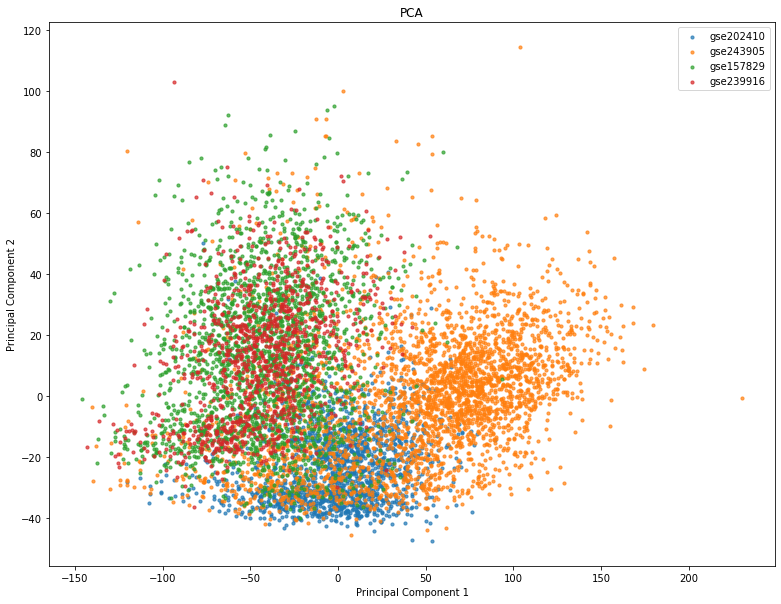

In [4]:
plt.figure(figsize=(13, 10))
for batch in pca_df['Batch'].unique():
    subset = pca_df[pca_df['Batch'] == batch]
    plt.scatter(subset['PC1'], subset['PC2'], label=batch,s=10, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.legend()
plt.show()

### Step 2: Compass Analaysis

In [2]:
# pathogenic Th17 = Th17p; non-pathogenic Th17 = Th17n
merged_meta.index = merged_df.columns
Th17p_cells = merged_meta[merged_meta['value'] == 'hiv'].index
Th17n_cells = merged_meta[merged_meta['value'] == 'unf'].index

In [3]:
reaction_metadata = pd.read_csv("extdata/RECON2/reaction_metadata.csv", index_col = 0) 

In [4]:
import numpy as np
#This function is repeated here for clarity
def get_reaction_consistencies(compass_reaction_penalties, min_range=1e-3):
    """
        Converts the raw penalties outputs of compass into scores per reactions where higher numbers indicate more activity
    """
    df = -np.log(compass_reaction_penalties + 1)
    df = df[df.max(axis=1) - df.min(axis=1) >= min_range]
    df = df - df.min().min()
    return df
reaction_consistencies = get_reaction_consistencies(merged_df)

In [5]:
reaction_consistencies

,1037cluster_0,1037cluster_1,1037cluster_2,1037cluster_3,1037cluster_4,1037cluster_5,1037cluster_6,1037cluster_7,1037cluster_8,1037cluster_9,...,YW8_viremiccluster_608,YW8_viremiccluster_609,YW8_viremiccluster_610,YW8_viremiccluster_611,YW8_viremiccluster_612,YW8_viremiccluster_613,YW8_viremiccluster_614,YW8_viremiccluster_615,YW8_viremiccluster_616,YW8_viremiccluster_617
10FTHF5GLUtl_pos,3.582579,3.582229,3.589720,3.601126,3.606470,3.588883,3.588795,3.590017,3.584447,3.579958,...,3.566637,3.564072,3.566999,3.586758,3.554003,3.577337,3.549183,3.566130,3.557383,3.560602
10FTHF5GLUtm_pos,3.259694,3.265757,3.224339,3.232182,3.231933,3.243555,3.270897,3.244738,3.243700,3.225899,...,3.230326,3.253887,3.230705,3.219895,3.226258,3.239818,3.192239,3.281892,3.194150,3.264111
10FTHF6GLUtl_pos,3.345039,3.345306,3.353853,3.368323,3.375420,3.352878,3.352772,3.354380,3.347064,3.341551,...,3.324744,3.321405,3.324712,3.350103,3.308850,3.338119,3.302785,3.323851,3.312807,3.315316
10FTHF6GLUtm_pos,3.174386,3.191413,3.141610,3.151940,3.152613,3.157977,3.183733,3.171387,3.169855,3.142930,...,3.154086,3.175028,3.157797,3.138135,3.149647,3.153328,3.101930,3.199454,3.104049,3.167538
10FTHF7GLUtl_pos,3.228617,3.247577,3.228627,3.238617,3.246812,3.233812,3.227357,3.241293,3.242590,3.211614,...,3.195019,3.203990,3.203815,3.218721,3.184897,3.207194,3.167066,3.204221,3.178044,3.181937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_decdicoa(c)_neg,1.989238,1.994680,1.992947,2.011410,1.992835,1.999988,1.992269,2.001646,1.995290,2.001433,...,1.993184,2.002265,1.992604,1.990298,1.995503,2.012900,1.976389,1.997646,1.989436,1.964469
sink_octdececoa(c)_neg,1.646280,1.658167,1.627285,1.652466,1.623766,1.638209,1.630911,1.654919,1.662057,1.642975,...,1.648494,1.636101,1.632121,1.623511,1.627656,1.642767,1.597916,1.649102,1.606874,1.592648
sink_pre_prot(r)_neg,7.503481,7.503989,7.509115,7.477259,7.509795,7.498985,7.494150,7.540232,7.523904,7.499196,...,7.521737,7.522765,7.508807,7.518067,7.511842,7.503886,7.469081,7.529710,7.497013,7.486884
sink_tetdec2coa(c)_neg,1.989238,1.994680,1.992947,2.011410,1.992835,1.999988,1.992269,2.001646,1.995290,2.001433,...,1.993184,2.002265,1.992604,1.990298,1.995503,2.012900,1.976389,1.997646,1.989436,1.964469


In [6]:
from compass_analysis import cohens_d, wilcoxon_test, get_reaction_consistencies, get_metareactions, labeled_reactions, amino_acid_metab
wilcox_results = wilcoxon_test(reaction_consistencies, Th17p_cells, Th17n_cells)
wilcox_results['metadata_r_id'] = ""
for r in wilcox_results.index:
    if r in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r
    elif r[:-4] in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r[:-4]
    else:
        print("Should not occur")

In [7]:
W = wilcox_results.merge(reaction_metadata, how='left', 
                         left_on='metadata_r_id', right_index=True, validate='m:1')
W = W[W['confidence'].isin([0,4])]
W = W[~W['EC_number'].isna()]
W.loc[(W['formula'].map(lambda x: '[m]' not in x)) & (W['subsystem'] == "Citric acid cycle"), 'subsystem'] = 'Other'

In [11]:
import matplotlib.pyplot as plt
def plot_differential_scores(data, title, c):
    plt.figure(figsize=(10,10))
    axs = plt.gca()
    axs.scatter(data['cohens_d'], -np.log10(data['adjusted_pval']), c=c)
    axs.set_xlabel("Cohen's d", fontsize=16)
    axs.set_ylabel("-log10 (Wilcoxon-adjusted p)", fontsize=16)
    #Everything after this should be tweaked depending on your application
    axs.set_xlim(-2.2, 2.2)
    axs.axvline(0, dashes=(3,3), c='black')
    axs.axhline(1, dashes=(3,3), c='black')
    axs.set_title(title, fontdict={'fontsize':20})
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(0, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#348C73', linewidth=4))
    axs.annotate('hiv', xy=(0.75, -0.12), xycoords='axes fraction', fontsize=16)
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(1, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#E92E87', linewidth=4))
    axs.annotate('unf', xy=(0.25, -0.12), xycoords='axes fraction', fontsize=16)
    for r in data.index:
        if r in labeled_reactions:
            x = data.loc[r, 'cohens_d']
            y = -np.log10(data.loc[r, 'adjusted_pval'])
            offset = (20, 0)
            if x < 0:
                offset = (-100, -40)
            axs.annotate(labeled_reactions[r], (x,y), xytext = offset,
                         textcoords='offset pixels', arrowprops={'arrowstyle':"-"})

In [9]:
filtered_data = pd.concat([W[W['subsystem'] == "Glycolysis/gluconeogenesis"],
             W[W['subsystem'] == "Citric acid cycle"],
            W[W['subsystem'].isin(amino_acid_metab)],
           W[W['subsystem'] == "Fatty acid oxidation"]])

In [49]:
set(W['subsystem'])

{'Alanine and aspartate metabolism',
 'Aminosugar metabolism',
 'Androgen and estrogen synthesis and metabolism',
 'Arachidonic acid metabolism',
 'Arginine and Proline Metabolism',
 'Bile acid synthesis',
 'Biotin metabolism',
 'Blood group synthesis',
 'Butanoate metabolism',
 'Cholesterol metabolism',
 'Chondroitin sulfate degradation',
 'Citric acid cycle',
 'CoA catabolism',
 'CoA synthesis',
 'Cysteine Metabolism',
 'Cytochrome metabolism',
 'D-alanine metabolism',
 'Eicosanoid metabolism',
 'Fatty acid oxidation',
 'Fatty acid synthesis',
 'Folate metabolism',
 'Fructose and mannose metabolism',
 'Galactose metabolism',
 'Glutamate metabolism',
 'Glutathione metabolism',
 'Glycerophospholipid metabolism',
 'Glycine, serine, alanine and threonine metabolism',
 'Glycolysis/gluconeogenesis',
 'Glycosphingolipid metabolism',
 'Glyoxylate and dicarboxylate metabolism',
 'Heme degradation',
 'Heme synthesis',
 'Heparan sulfate degradation',
 'Histidine metabolism',
 'Hyaluronan metabo

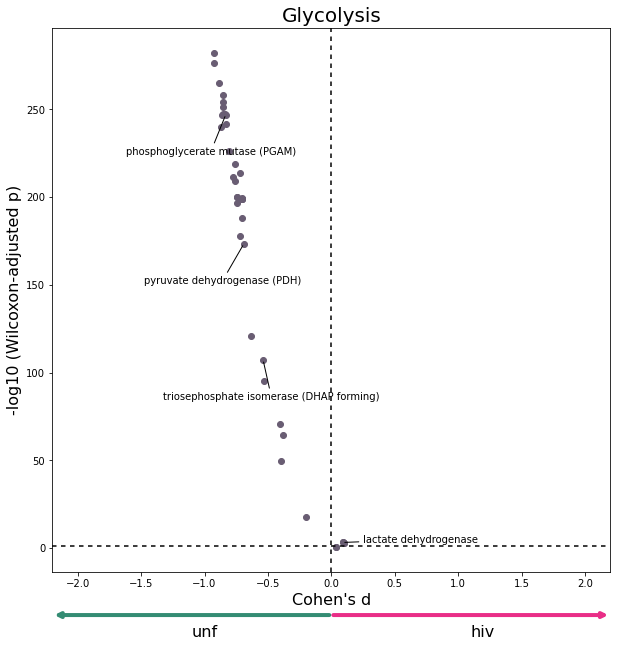

In [44]:
data = W[W['subsystem'] == "Glycolysis/gluconeogenesis"]
plot_differential_scores(data, title='Glycolysis', c="#695D73")

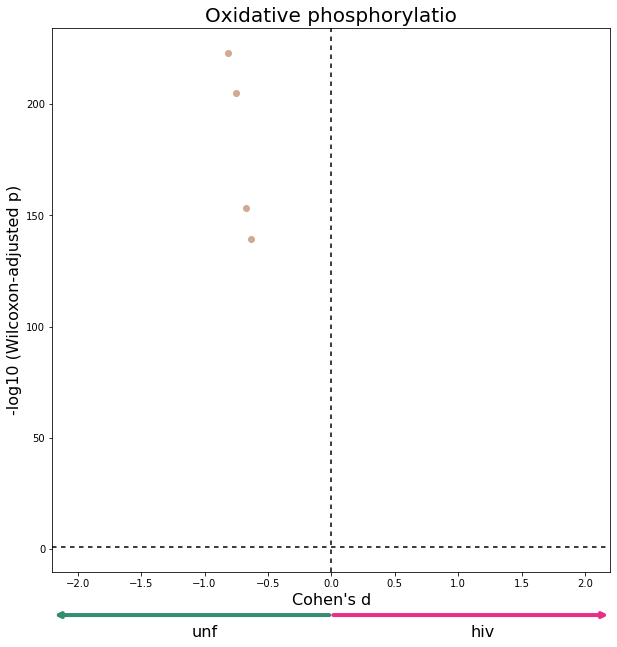

In [13]:
data = W[W['subsystem'] == "Oxidative phosphorylation"]
plot_differential_scores(data, title="Oxidative phosphorylatio", c="#D3A991")

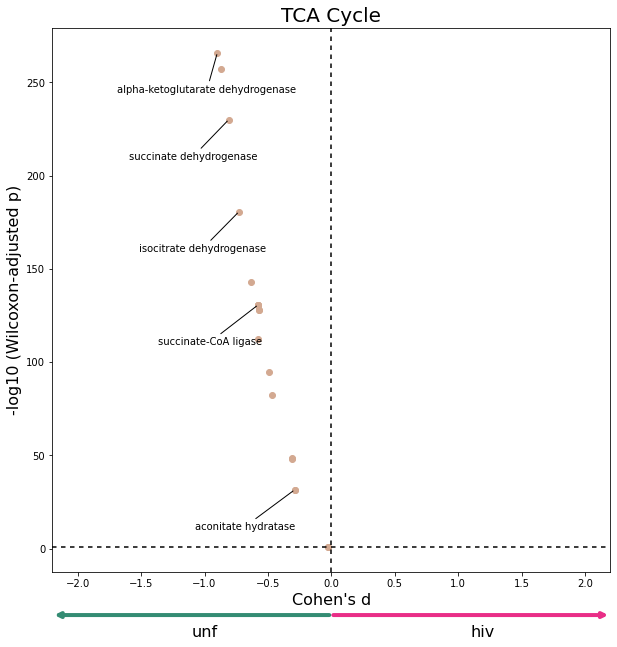

In [45]:
data = W[W['subsystem'] == "Citric acid cycle"]
plot_differential_scores(data, title="TCA Cycle", c="#D3A991")

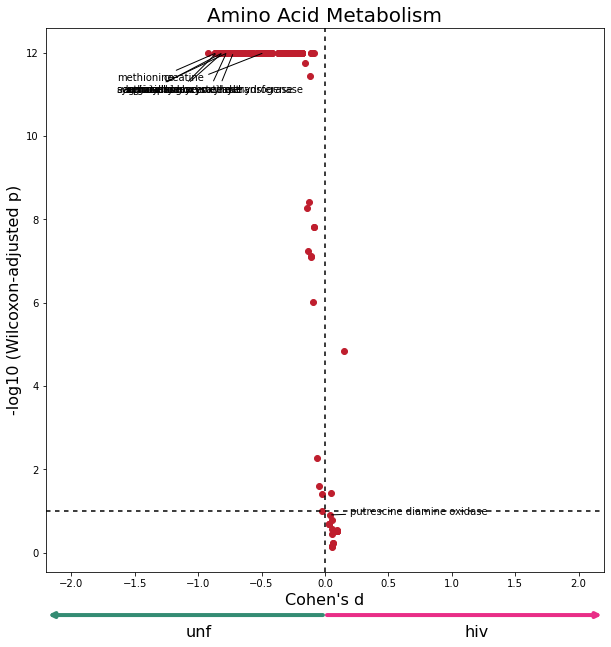

In [46]:
data = W[W['subsystem'].isin(amino_acid_metab)].copy()
data['adjusted_pval'] = data['adjusted_pval'].clip(1e-12)
plot_differential_scores(data, "Amino Acid Metabolism", c="#BF1E2E")

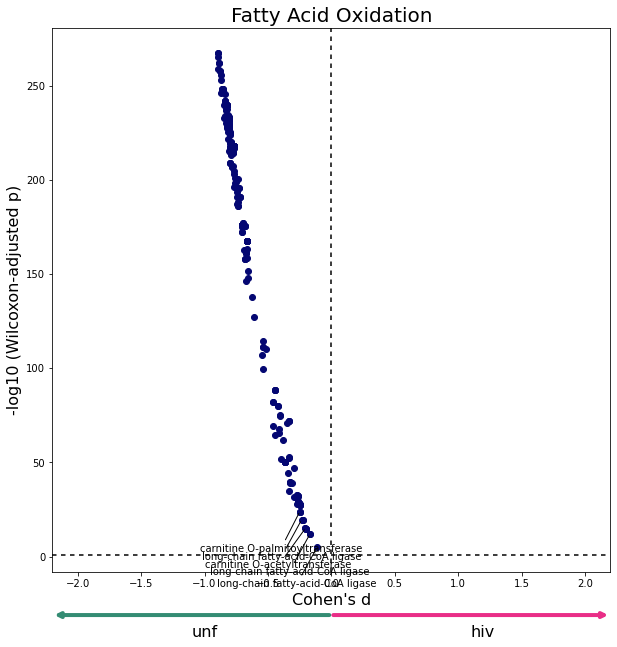

In [47]:
data = W[W['subsystem'] == "Fatty acid oxidation"]
plot_differential_scores(data, "Fatty Acid Oxidation", c="#040772")

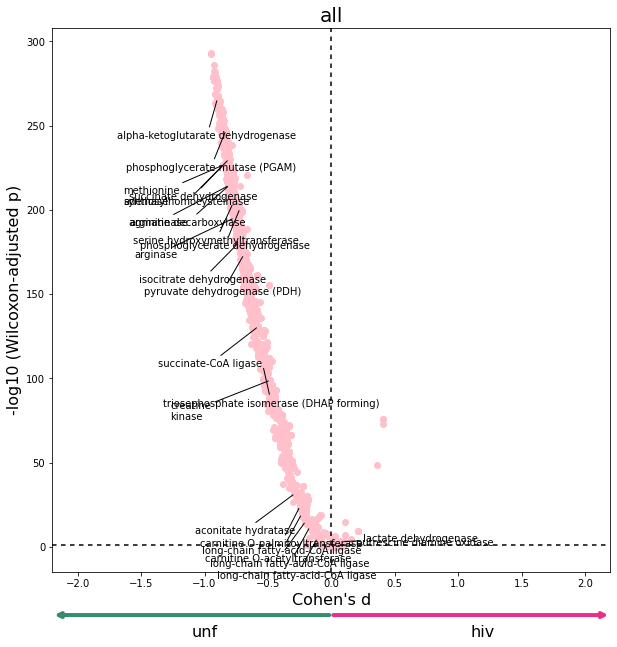

In [48]:
data = W
plot_differential_scores(data, title='all', c="pink")

In [ ]:
cell_metadata  = pd.Series(merged_meta["value"].values,index=merged_meta.index)

### Step3: Can we use T test

In [59]:
from scipy.stats import shapiro, f_oneway, probplot
# Shapiro-Wilk Test Function
def shapiro_test_for_gene_expression(expr_matrix, group):
    results = []
    for gene in expr_matrix.index:
        gene_expression = expr_matrix.loc[gene]
        group1_expr = gene_expression[group == 'hiv']
        group2_expr = gene_expression[group == 'unf']
        
        # Shapiro-Wilk test
        shapiro_group1 = shapiro(group1_expr)
        shapiro_group2 = shapiro(group2_expr)
        
        # Append results if p-value < 0.05
        if shapiro_group1.pvalue < 0.05 or shapiro_group2.pvalue < 0.05:
            results.append({
                'reaction': gene,
                'shapiro_cancer_pvalue': shapiro_group1.pvalue,
                'shapiro_other_pvalue': shapiro_group2.pvalue
            })
    
    return pd.DataFrame(results)

# F-test for Variances Function
def variance_test_for_gene_expression(expr_matrix, group):
    results = []
    for gene in expr_matrix.index:
        gene_expression = expr_matrix.loc[gene]
        group1_expr = gene_expression[group == 'hiv']
        group2_expr = gene_expression[group == 'unf']
        
        # F-test for equality of variances
        if len(group1_expr) > 1 and len(group2_expr) > 1:
            f_statistic, p_value = f_oneway(group1_expr, group2_expr).statistic, f_oneway(group1_expr, group2_expr).pvalue
            # Append results if p-value < 0.05
            if p_value < 0.05:
                results.append({
                    'reaction': gene,
                    'f_statistic': f_statistic,
                    'f_pvalue': p_value
                })
        else:
            results.append({
                'reaction': gene,
                'f_statistic': np.nan,
                'f_pvalue': np.nan
            })
    
    return pd.DataFrame(results)

def merge_meta(shapiro_results_df,reaction_metadata):
    shapiro_results_df.index = shapiro_results_df["reaction"]
    for r in shapiro_results_df.index:
        if r in reaction_metadata.index:
            shapiro_results_df.loc[r, 'metadata_r_id'] = r
        elif r[:-4] in reaction_metadata.index:
            shapiro_results_df.loc[r, 'metadata_r_id'] = r[:-4]
    shapiro_results_df = shapiro_results_df.merge(reaction_metadata, how='left', left_on='metadata_r_id', right_index=True, validate='m:1')
    return shapiro_results_df

In [60]:
# Perform Shapiro-Wilk test
shapiro_results_df = shapiro_test_for_gene_expression(reaction_consistencies, cell_metadata)
shapiro_results_df =merge_meta(shapiro_results_df,reaction_metadata)
print("Shapiro-Wilk Test Results:")
print(shapiro_results_df["reaction_name"])

# Perform F-test for variances
variance_results_df = variance_test_for_gene_expression(reaction_consistencies, cell_metadata)
variance_results_df =merge_meta(variance_results_df,reaction_metadata)
print("\nF-test for Variances Results:")
print(variance_results_df["reaction_name"])


C:\Users\HUAWEI\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5097.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HUAWEI\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Results:
reaction
10FTHF5GLUtl_pos                      5-glutamyl-10FTHF transport, lysosomal
10FTHF5GLUtm_pos                  5-glutamyl-10FTHF transport, mitochondrial
10FTHF6GLUtl_pos                      6-glutamyl-10FTHF transport, lysosomal
10FTHF6GLUtm_pos                  6-glutamyl-10FTHF transport, mitochondrial
10FTHF7GLUtl_pos                      7-glutamyl-10FTHF transport, lysosomal
                                                 ...                        
sink_decdicoa(c)_neg                        Sink for 2,6-dodecadienoylcoa(c)
sink_octdececoa(c)_neg                                        OCTDECECOASINK
sink_pre_prot(r)_neg       glycophosphatidylinositol (GPI)-anchored prote...
sink_tetdec2coa(c)_neg                                        TETDEC2COASINK
sink_tetdece1coa(c)_neg                                      TETDECE1COASINK
Name: reaction_name, Length: 6400, dtype: object

F-test for Variances Results:
reaction
10FTHF5GLUtl_pos            

### not normally distributed and the variance of most of the reaction is not equal, T test is not appliable